In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt
import seaborn as sns



In [2]:
player_val = pd.read_csv('../csv/player_valuations.csv')

### Step 1: Data Understanding ###
+ Dataframe shape
+ head 
+ dtypes
+ describe

In [3]:
player_val.shape

(440663, 9)

In [4]:
player_val.head(100)

,player_id,last_season,datetime,date,dateweek,market_value_in_eur,n,current_club_id,player_club_domestic_competition_id
0,3132,2013,2003-12-09 00:00:00,2003-12-09,2003-12-08,400000,1,126,TR1
1,6893,2012,2003-12-15 00:00:00,2003-12-15,2003-12-15,900000,1,984,GB1
2,10,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,7000000,1,398,IT1
3,26,2017,2004-10-04 00:00:00,2004-10-04,2004-10-04,1500000,1,16,L1
4,65,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,8000000,1,1091,GR1
...,...,...,...,...,...,...,...,...,...
95,1944,2013,2004-10-04 00:00:00,2004-10-04,2004-10-04,250000,1,23,L1
96,1986,2016,2004-10-04 00:00:00,2004-10-04,2004-10-04,1500000,1,167,L1
97,2048,2012,2004-10-04 00:00:00,2004-10-04,2004-10-04,50000,1,403,NL1
98,2050,2014,2004-10-04 00:00:00,2004-10-04,2004-10-04,2000000,1,24,L1


In [5]:
player_val.columns

Index(['player_id', 'last_season', 'datetime', 'date', 'dateweek',
       'market_value_in_eur', 'n', 'current_club_id',
       'player_club_domestic_competition_id'],
      dtype='object')

player_val.dtypes

In [6]:
player_val['n'].unique()

array([1], dtype=int64)

In [7]:
player_val['dateweek'].unique()

array(['2003-12-08', '2003-12-15', '2004-10-04', '2004-10-11',
       '2004-10-18', '2004-10-25', '2004-11-01', '2004-11-08',
       '2004-11-15', '2004-11-22', '2004-11-29', '2004-12-06',
       '2004-12-13', '2004-12-20', '2004-12-27', '2005-01-03',
       '2005-01-10', '2005-01-17', '2005-01-24', '2005-01-31',
       '2005-02-07', '2005-02-14', '2005-02-21', '2005-02-28',
       '2005-03-07', '2005-03-14', '2005-03-21', '2005-03-28',
       '2005-04-04', '2005-04-11', '2005-04-18', '2005-04-25',
       '2005-05-02', '2005-05-09', '2005-05-16', '2005-05-23',
       '2005-05-30', '2005-06-06', '2005-06-13', '2005-06-20',
       '2005-06-27', '2005-07-04', '2005-07-11', '2005-07-18',
       '2005-07-25', '2005-08-01', '2005-08-08', '2005-08-15',
       '2005-08-22', '2005-08-29', '2005-09-05', '2005-09-12',
       '2005-09-19', '2005-09-26', '2005-10-03', '2005-10-10',
       '2005-10-17', '2005-10-24', '2005-10-31', '2005-11-07',
       '2005-11-14', '2005-11-21', '2005-11-28', '2005-

In [8]:
player_val['datetime'].unique()

array(['2003-12-09 00:00:00', '2003-12-15 00:00:00',
       '2004-10-04 00:00:00', ..., '2023-09-19 00:00:00',
       '2023-09-21 00:00:00', '2023-12-19 00:00:00'], dtype=object)

+ player_id: Unique identifier of the player.
+ last_season: Last season the player participated in.
+ datetime: Contains the date and time when the data was recorded.
+ date: Similar to 'datetime', but without the time component.
+ dateweek: Represents the first day of the week when the 'datetime' value was recorded (typically Monday).
+ market_value_in_eur: Player's market value in Euros.
+ n: An apparently meaningless value, consistently set to 1.
+ current_club_id: Unique identifier of the player's current club.
+ player_club_domestic_competition_id: Unique identifier of the domestic competition of the player's club.

### Step 2: Data Preperation ###
+ Dropping irrelevant columns and rows
+ Identifying duplicated columns
+ Feature Creation
+ Casting dtypes
+ Adding new columns

In [9]:
new_player_val = player_val[['player_id', 'last_season', 'date', 'market_value_in_eur', 'current_club_id', 'player_club_domestic_competition_id']].copy()

In [10]:
new_player_val.shape

(440663, 6)

In [11]:
null_counts = new_player_val.isna().sum()
null_counts

player_id                              0
last_season                            0
date                                   0
market_value_in_eur                    0
current_club_id                        0
player_club_domestic_competition_id    0
dtype: int64

In [12]:
new_player_val['player_id'].unique()

array([   3132,    6893,      10, ...,  968903, 1031590, 1166093],
      dtype=int64)

In [13]:
selected_rows = new_player_val.loc[new_player_val['player_id'] == 3132]
selected_rows

,player_id,last_season,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,3132,2013,2003-12-09,400000,126,TR1
145,3132,2013,2004-10-04,2000000,126,TR1
11277,3132,2013,2007-10-04,2200000,126,TR1
15755,3132,2013,2008-05-04,2800000,126,TR1
19556,3132,2013,2008-10-09,1500000,126,TR1
24001,3132,2013,2009-02-11,1250000,126,TR1
25803,3132,2013,2009-05-25,1500000,126,TR1
30665,3132,2013,2009-10-05,1300000,126,TR1
35481,3132,2013,2010-01-29,1000000,126,TR1
48771,3132,2013,2011-01-21,1700000,126,TR1


In [14]:
new_player_val.dtypes

player_id                               int64
last_season                             int64
date                                   object
market_value_in_eur                     int64
current_club_id                         int64
player_club_domestic_competition_id    object
dtype: object

In [15]:
new_player_val['last_season'] = pd.to_datetime(new_player_val['last_season'], format='%Y')



In [16]:
new_player_val.dtypes

player_id                                       int64
last_season                            datetime64[ns]
date                                           object
market_value_in_eur                             int64
current_club_id                                 int64
player_club_domestic_competition_id            object
dtype: object

In [17]:
new_player_val.head(10)

,player_id,last_season,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,3132,2013-01-01,2003-12-09,400000,126,TR1
1,6893,2012-01-01,2003-12-15,900000,984,GB1
2,10,2015-01-01,2004-10-04,7000000,398,IT1
3,26,2017-01-01,2004-10-04,1500000,16,L1
4,65,2015-01-01,2004-10-04,8000000,1091,GR1
5,77,2012-01-01,2004-10-04,13000000,506,IT1
6,80,2017-01-01,2004-10-04,400000,27,L1
7,109,2012-01-01,2004-10-04,9500000,825,TR1
8,123,2012-01-01,2004-10-04,9500000,33,L1
9,132,2015-01-01,2004-10-04,13000000,11,GB1


In [18]:
new_player_val = new_player_val.sort_values(by='date', ascending=False)
new_player_val_unique = new_player_val.groupby('player_id').first().reset_index()
new_player_val_unique.columns

Index(['player_id', 'last_season', 'date', 'market_value_in_eur',
       'current_club_id', 'player_club_domestic_competition_id'],
      dtype='object')

In [19]:
new_player_val_unique.loc[new_player_val_unique.duplicated(subset=['market_value_in_eur'])]

,player_id,last_season,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
2,65,2015-01-01,2016-06-21,1000000,1091,GR1
8,162,2012-01-01,2013-01-13,200000,79,L1
10,258,2013-01-01,2015-01-01,100000,33,L1
11,264,2012-01-01,2018-03-15,100000,79,L1
12,276,2013-01-01,2013-05-24,200000,20100,DK1
...,...,...,...,...,...,...
28789,1134676,2023-01-01,2023-09-14,100000,18303,UKR1
28790,1141628,2023-01-01,2023-07-29,50000,2381,TR1
28791,1162593,2023-01-01,2023-08-14,50000,6890,TR1
28792,1162979,2023-01-01,2023-08-25,50000,126,TR1


In [20]:
new_player_val_unique.dtypes 

player_id                                       int64
last_season                            datetime64[ns]
date                                           object
market_value_in_eur                             int64
current_club_id                                 int64
player_club_domestic_competition_id            object
dtype: object

In [21]:
new_player_val_unique['date'] = pd.to_datetime(new_player_val_unique['date'], errors='coerce')

In [22]:
new_player_val_unique.dtypes

player_id                                       int64
last_season                            datetime64[ns]
date                                   datetime64[ns]
market_value_in_eur                             int64
current_club_id                                 int64
player_club_domestic_competition_id            object
dtype: object

In [23]:
seasons = new_player_val_unique['last_season'].unique()

seasons

<DatetimeArray>
['2015-01-01 00:00:00', '2017-01-01 00:00:00', '2012-01-01 00:00:00',
 '2013-01-01 00:00:00', '2014-01-01 00:00:00', '2016-01-01 00:00:00',
 '2019-01-01 00:00:00', '2018-01-01 00:00:00', '2022-01-01 00:00:00',
 '2023-01-01 00:00:00', '2021-01-01 00:00:00', '2020-01-01 00:00:00']
Length: 12, dtype: datetime64[ns]

In [24]:
new_player_val_unique['market_value_billion'] = new_player_val_unique['market_value_in_eur'] / 1_000_000
new_player_val_unique.head()

,player_id,last_season,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id,market_value_billion
0,10,2015-01-01,2016-01-04,1000000,398,IT1,1.00
1,26,2017-01-01,2017-12-28,750000,16,L1,0.75
2,65,2015-01-01,2016-06-21,1000000,1091,GR1,1.00
3,77,2012-01-01,2016-11-15,200000,506,IT1,0.20
4,80,2017-01-01,2018-06-05,100000,27,L1,0.10


### Step 3: Feature Understanding ###
+ My questions
    + What is the average age of the players in the CSV file?
    + What is the distribution of preferred foot among the players?
    + At what age is the highest market value reached? And what is the age difference compared to the average age once the highest market value is reached?
    + What are the positions of the players present in the file?
    + Are there any outliers in the height of the players?
    + Does the market value of the players fluctuate more among active or inactive players?
+ Plotting Feature Distributions
       + Histogram
       + Bar Chart
       + Boxplot
       + Scatterplot
       + HeatMap

In [25]:
new_player_val_unique.columns

Index(['player_id', 'last_season', 'date', 'market_value_in_eur',
       'current_club_id', 'player_club_domestic_competition_id',
       'market_value_billion'],
      dtype='object')

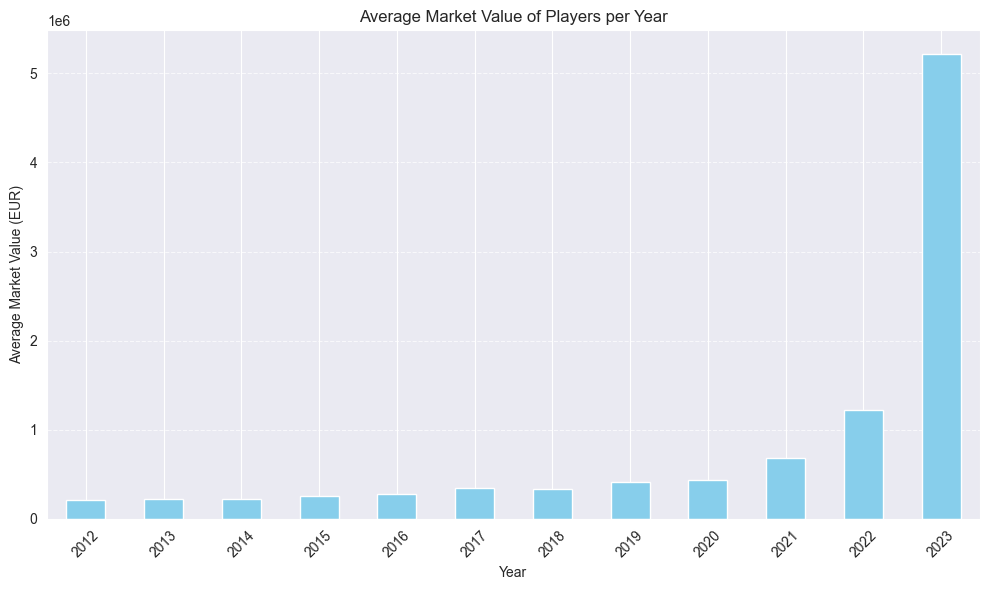

In [26]:
new_player_val_unique['last_season_year'] = pd.to_datetime(new_player_val_unique['last_season']).dt.year

# Calculate the average market_value_billion for each year
average_market_value_per_year = new_player_val_unique.groupby('last_season_year')['market_value_in_eur'].mean()

# Plot the average market_value_billion against the years
plt.figure(figsize=(10, 6))
average_market_value_per_year.plot(kind='bar', color='skyblue')
plt.title('Average Market Value of Players per Year')
plt.xlabel('Year')
plt.ylabel('Average Market Value (EUR)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [27]:
count_per_year = new_player_val_unique['last_season_year'].value_counts()
count_per_year

last_season_year
2023    6407
2022    3249
2021    2455
2018    2235
2020    2187
2013    1976
2016    1852
2019    1771
2017    1734
2015    1660
2014    1638
2012    1630
Name: count, dtype: int64

<h3> Displaying the top 5 teams with the highest total market value of their players </h3>

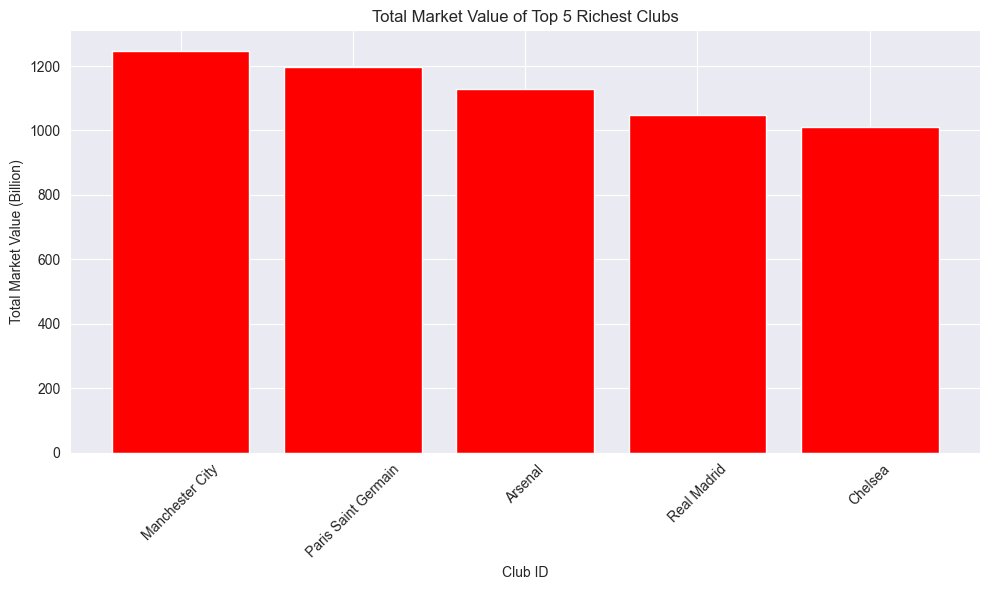

In [28]:
#Calculate the sum of the market values of players for each club
club_market_value = new_player_val_unique.groupby('current_club_id')['market_value_billion'].sum().reset_index()

#The club names were obtained from the club_games table...
top_clubs = club_market_value.nlargest(5, "market_value_billion")

richest_club_players = new_player_val_unique[new_player_val_unique['current_club_id'].isin(top_clubs['current_club_id'])]
club_names = {
    281: "Manchester City",
    583: "Paris Saint Germain",
    11: "Arsenal",
    418: "Real Madrid",
    631: "Chelsea"
}

#I replace the IDs with the team names
top_clubs['current_club_id'] = top_clubs['current_club_id'].map(club_names)

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_clubs)), top_clubs['market_value_billion'], color="red")
plt.xlabel('Club ID')
plt.ylabel('Total Market Value (Billion)')
plt.title('Total Market Value of Top 5 Richest Clubs')
plt.xticks(range(len(top_clubs)), top_clubs['current_club_id'], rotation=45)
plt.tight_layout()
plt.show()


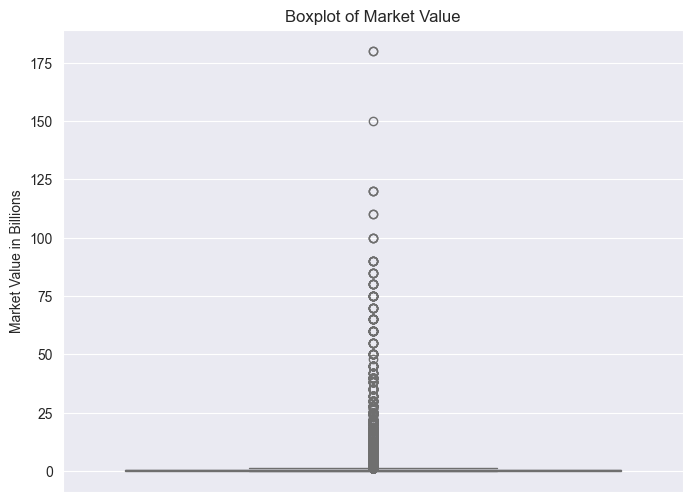

In [29]:
plt.figure(figsize=(8, 6))

# Create a boxplot using Seaborn
sns.boxplot(data=new_player_val_unique['market_value_billion'].dropna(), color='skyblue')

# Set the title and labels
plt.title('Boxplot of Market Value')
plt.ylabel('Market Value in Billions')

# Show the plot
plt.show()

In [30]:
domestic_competition_ids = new_player_val_unique['player_club_domestic_competition_id'].unique()
domestic_competition_ids

array(['IT1', 'L1', 'GR1', 'TR1', 'GB1', 'ES1', 'DK1', 'RU1', 'FR1',
       'SC1', 'BE1', 'NL1', 'UKR1', 'PO1'], dtype=object)

<h3>Showing the top 5 domestic competitions with the highest number of players</h3>

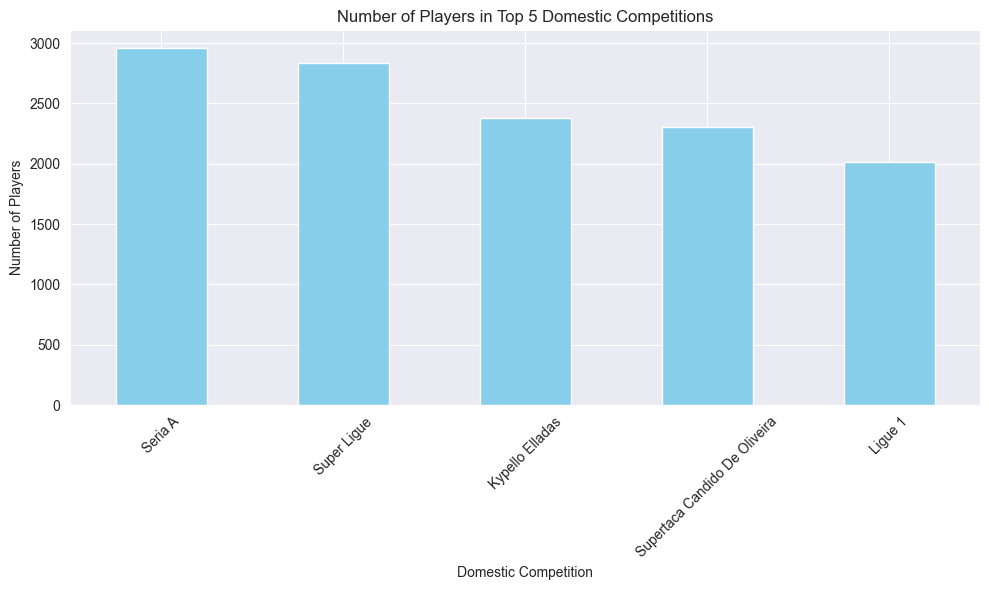

In [31]:
top_5_competitions = new_player_val_unique['player_club_domestic_competition_id'].value_counts().head(5)

competition_names = {
    "IT1": "Seria A",
    "TR1": "Super Ligue",
    "GR1": "Kypello Elladas",
    "PO1": "Supertaca Candido De Oliveira",
    "FR1": "Ligue 1"
}

# Map competition names to the top 5 competitions
top_5_competitions = top_5_competitions.rename(index=competition_names)

plt.figure(figsize=(10, 6))
top_5_competitions.plot(kind='bar', color='skyblue')
plt.xlabel('Domestic Competition')
plt.ylabel('Number of Players')
plt.title('Number of Players in Top 5 Domestic Competitions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h3>Showing the top 5 domestic competitions with the highest number of players for the last season only</h3>

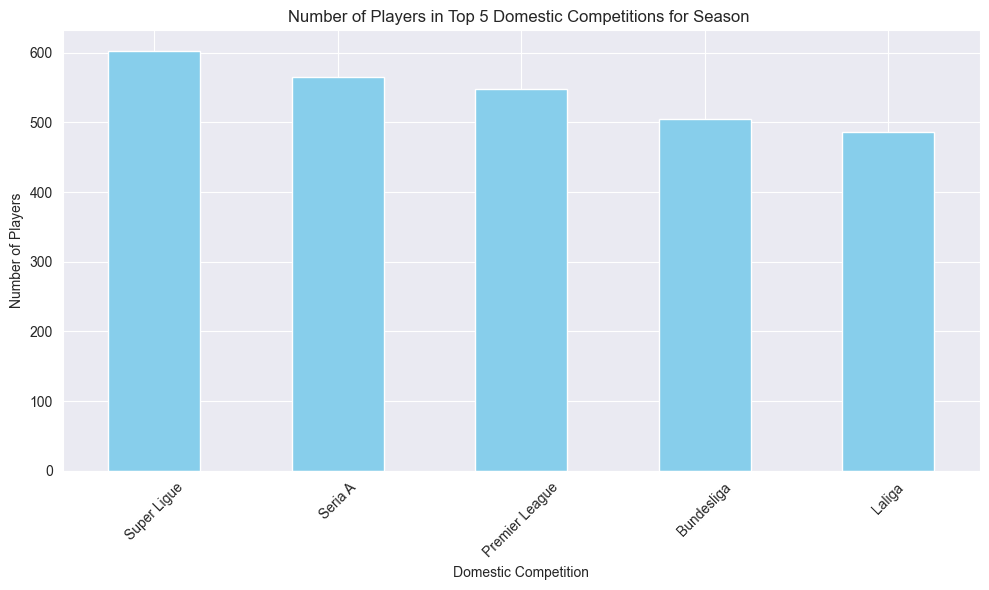

In [32]:
last_season = new_player_val_unique['last_season'].max()

new_player_val_last_season = new_player_val_unique[new_player_val_unique['last_season'] == last_season]

top_5_competitions = new_player_val_last_season['player_club_domestic_competition_id'].value_counts().head(5)

competition_names = {
    "IT1": "Seria A",
    "TR1": "Super Ligue",
    "GB1": "Premier League",
    "L1": "Bundesliga",
    "ES1": "Laliga"
}

top_5_competitions = top_5_competitions.rename(index=competition_names)

plt.figure(figsize=(10, 6))
top_5_competitions.plot(kind='bar', color='skyblue')
plt.xlabel('Domestic Competition')
plt.ylabel('Number of Players')
plt.title('Number of Players in Top 5 Domestic Competitions for Season ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()